<a href="https://colab.research.google.com/github/Ira-a02/Algorithm/blob/main/ACO_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random

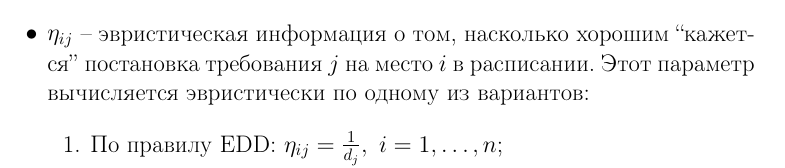

In [ ]:
def get_eta(task_times):
    return 1 / np.array(task_times)

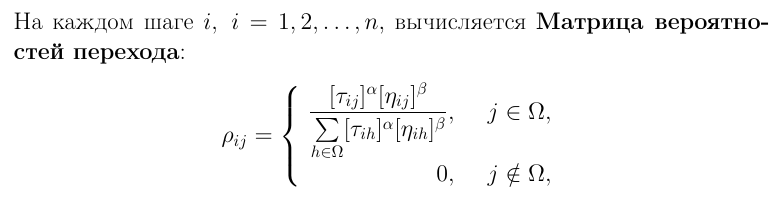

In [ ]:
def calculate_probabilities(pheromones, eta, alpha, beta):
    probabilities = (pheromones ** alpha) * (eta ** beta)
    probabilities_sum = probabilities.sum()
    return probabilities / probabilities_sum


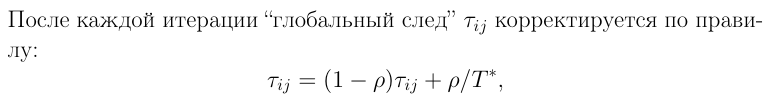

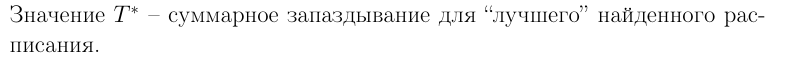

In [ ]:
def update_pheromones(pheromones, solution, delay, rho):
    pheromones = (1 - rho)*pheromones

    for task in solution:
        pheromones[task] = pheromones[task] + rho / delay
    return pheromones

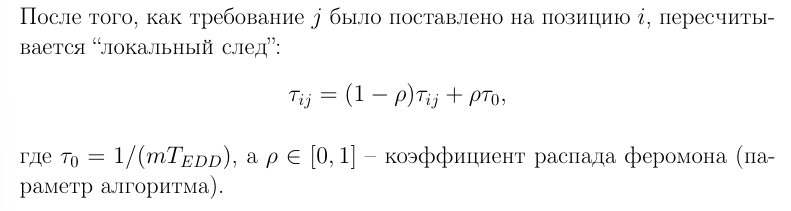

In [ ]:
def update_pheromones_local(pheromones, solution, delay, rho, ants):
    pheromones = (1 - rho)*pheromones

    for task in solution:
        pheromones[task] = pheromones[task] + 1 / (ants * delay)
    return pheromones

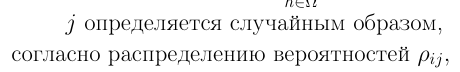

In [ ]:
def get_solution(num_tasks, pheromones, eta, alpha, beta):
    visited = np.zeros(num_tasks, dtype=bool)
    solution = []

    for i in range(num_tasks):
        unvisited_indices = np.where(~visited)[0]
        unvisited_eta = eta[unvisited_indices]
        unvisited_pheromones = pheromones[unvisited_indices]
        probabilities = calculate_probabilities(unvisited_pheromones, unvisited_eta, alpha, beta)


        next_task_index = np.random.choice(unvisited_indices, p=probabilities)
        solution.append(next_task_index)
        visited[next_task_index] = True

    return solution

In [ ]:
def ACO(task_times, deadlines, ants, iter, alpha, beta, rho):
    num_tasks = len(task_times)
    pheromones = np.ones(num_tasks)
    best_solution = None
    best_delay = float('inf')
    eta = get_eta(task_times)

    for i in range(iter):
        solutions = []
        delays = []

        for ant in range(ants):
            solution = get_solution(num_tasks, pheromones, eta, alpha, beta)
            completion_times = np.zeros(num_tasks)
            total_delay = 0

            for i, task in enumerate(solution):
                if i == 0:
                    completion_times[task] = task_times[task]
                else:
                    completion_times[task] = completion_times[solution[i-1]] + task_times[task]

                total_delay += max(0, completion_times[task] - deadlines[task])

            solutions.append(solution)
            delays.append(total_delay)
            pheromones = update_pheromones_local(pheromones, solution, total_delay, rho, ants)
        total_delay = min(delays)

        if total_delay <= best_delay:
            best_delay = total_delay
            best_solution = solution

        pheromones = update_pheromones(pheromones, best_solution, best_delay, rho)

    return best_solution, best_delay

In [ ]:
n = 5  # количество задач
ants=1
iter=10
alpha=2.0
beta=2.0
rho=0.4
task_times = np.array([121, 79, 147, 83, 130])
deadlines = np.array([260, 266, 266, 336, 337])

# task_times = np.random.randint(1, 10, size=n)
# deadlines = np.random.randint(1, 20, size=n)

best_solution, best_delay = ACO(task_times, deadlines, ants, iter, alpha, beta, rho)

print("Лучшее решение:", best_solution)
print("Суммарное запаздывание:", best_delay)
print("Время выполнения задач:", task_times)
print("Дедлайны задач:", deadlines)

Лучшее решение: [np.int64(1), np.int64(2), np.int64(3), np.int64(0), np.int64(4)]
Суммарное запаздывание: 393.0
Время выполнения задач: [121  79 147  83 130]
Дедлайны задач: [260 266 266 336 337]


In [ ]:
n = 5  # количество задач
ants=10
iter=10
alpha=2.0
beta=2.0
rho=0.4
task_times = np.array([121, 79, 147, 83, 130])
deadlines = np.array([260, 266, 266, 336, 337])

# task_times = np.random.randint(1, 10, size=n)
# deadlines = np.random.randint(1, 20, size=n)

best_solution, best_delay = ACO(task_times, deadlines, ants, iter, alpha, beta, rho)

print("Лучшее решение:", best_solution)
print("Суммарное запаздывание:", best_delay)
print("Время выполнения задач:", task_times)
print("Дедлайны задач:", deadlines)

Лучшее решение: [np.int64(3), np.int64(1), np.int64(4), np.int64(0), np.int64(2)]
Суммарное запаздывание: 370.0
Время выполнения задач: [121  79 147  83 130]
Дедлайны задач: [260 266 266 336 337]


In [ ]:
n = 5  # количество задач
ants=10
iter=10
alpha=2.0
beta=2.0
rho=0.4
task_times = np.array([121, 79, 147, 83, 130])
deadlines = np.array([260, 266, 266, 336, 337])

# task_times = np.random.randint(1, 10, size=n)
# deadlines = np.random.randint(1, 20, size=n)

best_solution, best_delay = ACO(task_times, deadlines, ants, iter, alpha, beta, rho)

print("Лучшее решение:", best_solution)
print("Суммарное запаздывание:", best_delay)
print("Время выполнения задач:", task_times)
print("Дедлайны задач:", deadlines)

Лучшее решение: [np.int64(2), np.int64(3), np.int64(1), np.int64(4), np.int64(0)]
Суммарное запаздывание: 370.0
Время выполнения задач: [121  79 147  83 130]
Дедлайны задач: [260 266 266 336 337]
